## **Visualitation Activity-Based Day Condition Model**

* **sklearn.model_selection.train_test_split:** Used for splitting data into training and testing sets, though not used in the current script.

*  **pandas:** Used for data manipulation and analysis.
*  **numpy:** Used for numerical operations.

*  **seaborn:** Used for statistical data visualization.

* **matplotlib.pyplot:** Used for plotting graphs and charts.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the data from an Excel file named 'MOOD TRAK.xlsx' into a DataFrame.

Display the first few rows of the DataFrame to inspect the data.

In [2]:
df=pd.read_excel('MOOD TRAK.xlsx')
df.head()

,Time Stamp,Activities,Duration,Quality,Note
0,2024-05-01,Sleep,300,3,Bangun pagi untuk sholat subuh.
1,2024-05-01,Self Care,30,4,"Mandi dan bersiap, air dingin di pagi hari tid..."
2,2024-05-01,Eating,30,4,Sarapan pagi dengan roti bakar dan susu.
3,2024-05-01,Workout,60,5,Jogging sekitar kos-kosan. Bertemu banyak anak...
4,2024-05-01,Traveling,30,5,"Berangkat ke kampus, perjalanan sekitar 2 km d..."


- Drop the 'Note' column as it is not used in the model.

- Convert the 'Time Stamp' column to datetime format and retain only the date part.

- Convert the 'Start' and 'End' columns to datetime format and retain only the time part.

- Calculate the duration of each activity as the difference between 'End' and 'Start' times.

- Adjust for activities that span past midnight by adding a day to negative durations.

- Convert the duration from timedelta to minutes.

In [3]:
# Drop 'Note' columns because its not used in this model
df_new=df.drop(columns=['Note'])
df_new['Time Stamp'] = pd.to_datetime(df_new['Time Stamp']).dt.date

- Filter the DataFrame for activities on a specific date ('2024-07-13').

- Group by 'Activities' and calculate the mean duration for each activity.

- Set up colors for the pie chart using Seaborn's color palette.

- Create a pie chart to visualize the duration of each activity on the specified day.

- Add a title, remove the y-axis label, and create a legend with activity durations.

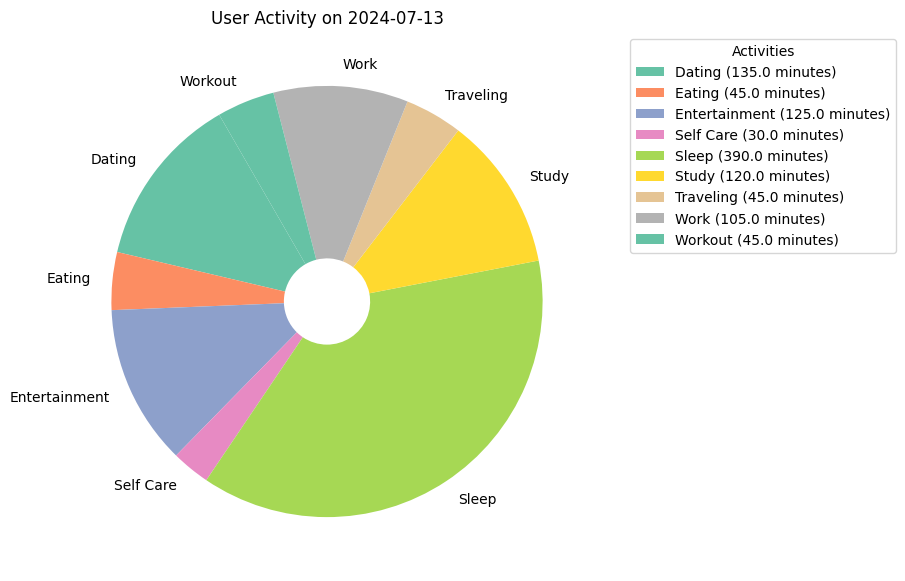

In [4]:
day_to_plot = '2024-07-13'
day_data = df_new[df_new['Time Stamp'] ==pd.to_datetime(day_to_plot).date()]
activity_duration = day_data.groupby('Activities')['Duration'].mean()
colors = sns.color_palette('Set2', len(activity_duration))

plt.figure(figsize=(7, 7))
activity_duration.plot(kind='pie', startangle=120, colors=colors, wedgeprops={'width': 0.8})
plt.title(f'User Activity on {day_to_plot}')
plt.ylabel('')
handles, labels = plt.gca().get_legend_handles_labels()
labels_with_duration = [f'{label} ({activity_duration[label]:.1f} minutes)' for label in labels]
plt.legend(handles, labels_with_duration, title='Activities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()